# Solvers for Linear Algebraic Equations

We have implemented multigrid solvers for linear algebraic systems arising from various finite element methods. Here we briefly present the usage for a symmetric and positive definite matrix equation `Ax = b`.

    x = A\b;
    x = amg(A,b);
    x = mg(A,b,elem);
    
Backslash `\` is the build-in direct solver of MATLAB. It is suitable for small size problems. `x = amg(A,b)` implements algebraic multigrid solver. To acheive multigrid efficiency, a hierarchical 'grids' is generated from the graph of `A`. When the mesh is avaiable, `x = mg(A,b,elem)` implements geometric multigrid solvers. Inside `mg`, an coarsening algorithm is applied to the mesh given by `elem`. 

More options is allowed in `mg` and `amg`. Try `help mg` and `help amg` for possible options including tolerance, V or W-cycles, number of smoothings steps, and print level etc.

Here we include several examples for discrete Poisson matrices. Solvers for other finite element methods and other equations can be found
- [List of Examples](solverlist.html)

## Example: 2-D Linear Element 

Direct solver
Elapsed time is 1.293569 seconds.

 Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:   263169,  #nnz:  1303561, smoothing: (1,1), iter: 10,   err = 1.35e-09,   time =  1.1 s
Elapsed time is 1.186739 seconds.

 Algebraic Multigrid W-cycle Preconditioner with Conjugate Gradient Method
  nnz/N: 4.96,   level:  6,   coarse grid 169,   nnz/Nc 9.38
#dof:  263169,    iter: 14,   err = 5.5672e-09,   time = 4.65 s
 
Elapsed time is 4.334722 seconds.
Difference between direct and mg, amg solvers 1.4e-09, 7.8e-08 


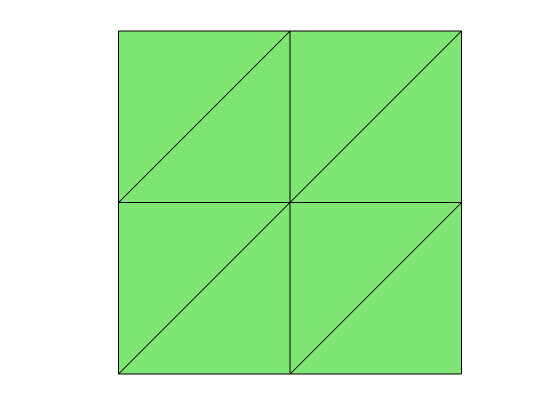

In [1]:
% setting
mesh.shape = 'square';
mesh.type = 'uniform';
mesh.size = 2e5;
pde = 'Poisson';
fem = 'P1';
% get the matrix
[eqn,T] = getfemmatrix(mesh,pde,fem);
% compare solvers
tic; disp('Direct solver'); x1 = eqn.A\eqn.b; toc;
tic; x2 = mg(eqn.A,eqn.b,T.elem); toc;
tic; x3 = amg(eqn.A,eqn.b); toc;
format shorte
fprintf('Difference between direct and mg, amg solvers %0.2g, %0.2g \n',...
         norm(x1-x2)/norm(eqn.b),norm(x1-x3)/norm(eqn.b));

For problem size of $2.6 \times 10^5$, `mg` ties with direct solver `\`. But `amg` is aroud 3-4 times slover.

## Example: 2-D Adaptive Meshes

Direct solver
Elapsed time is 3.347438 seconds.

 Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:   738561,  #nnz:  3682043, smoothing: (1,1), iter: 10,   err = 6.29e-09,   time =  3.1 s
Elapsed time is 2.843210 seconds.

 Algebraic Multigrid W-cycle Preconditioner with Conjugate Gradient Method
  nnz/N: 4.99,   level:  6,   coarse grid 453,   nnz/Nc 9.72
#dof:  738561,    iter: 15,   err = 2.9982e-09,   time = 14.9 s
 
Elapsed time is 13.711571 seconds.
Difference between direct and mg, amg solvers 1.2e-08, 6e-08 


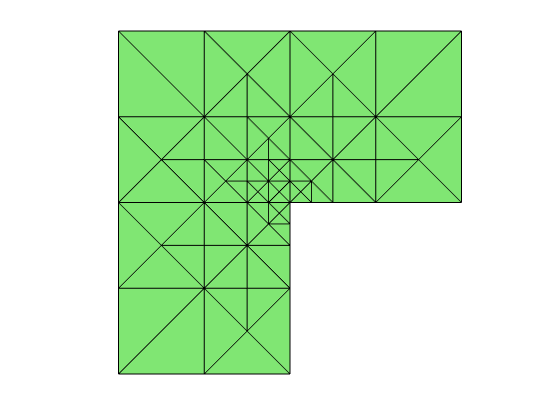

In [7]:
%% Lshape adaptive grids
mesh.shape = 'Lshape';
mesh.type = 'adaptive';
mesh.size = 2e4;
pde = 'Poisson';
fem = 'P1';
% get the matrix
[eqn,T] = getfemmatrix(mesh,pde,fem);
% compare solvers
tic; disp('Direct solver'); x1 = eqn.A\eqn.b; toc;
tic; x2 = mg(eqn.A,eqn.b,T.elem); toc;
tic; x3 = amg(eqn.A,eqn.b); toc;
fprintf('Difference between direct and mg, amg solvers %0.2g, %0.2g \n',...
         norm(x1-x2)/norm(eqn.b),norm(x1-x3)/norm(eqn.b));

The finest mesh is several uniform refinement of an adaptive mesh shown above. Now the multigrid outperforms the direct solver around the size of 7e5. amg is 4-5 times slower.

## Example: 3-D Linear Element

Direct solver
Elapsed time is 0.443978 seconds.

 Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    35937,  #nnz:   202771, smoothing: (1,1), iter: 11,   err = 5.50e-09,   time = 0.18 s
Elapsed time is 0.150138 seconds.

 Algebraic Multigrid W-cycle Preconditioner with Conjugate Gradient Method
  nnz/N: 5.81,   level:  4,   coarse grid 305,   nnz/Nc 30.80
#dof:   35937,    iter: 10,   err = 3.5316e-09,   time = 0.92 s
 
Elapsed time is 0.645183 seconds.
Difference between direct and mg, amg solvers 1e-09, 4.2e-09 


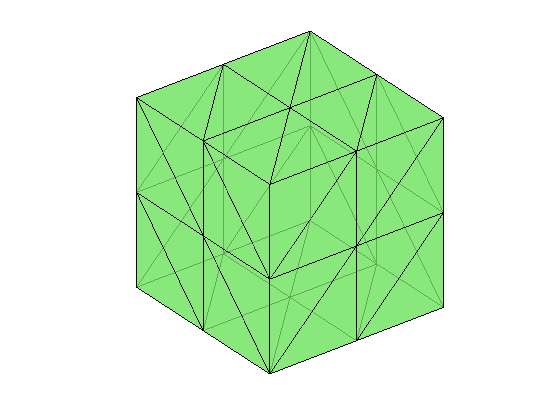

In [10]:
% Cube uniform grids
mesh.shape = 'cube';
mesh.type = 'uniform';
mesh.size = 2e4;
pde = 'Poisson';
fem = 'P1';
% get the matrix
[eqn,T] = getfemmatrix3(mesh,pde,fem);
% compare solvers
tic; disp('Direct solver'); x1 = eqn.A\eqn.b; toc;
tic; x2 = mg(eqn.A,eqn.b,T.elem); toc;
tic; x3 = amg(eqn.A,eqn.b); toc;
fprintf('Difference between direct and mg, amg solvers %0.2g, %0.2g \n',...
         norm(x1-x2)/norm(eqn.b),norm(x1-x3)/norm(eqn.b));

For 3-D linear element, `mg` wins at an even smaller size $3.6\times 10^4$. Again `amg` is 3-4 times slower than `mg`. 